In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Step 1: Data Exploration
df = pd.read_csv('/content/T-20 World cup 2022.csv')

In [25]:
# Data Exploration
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("Summary Statistics:", df.describe())

Dataset Shape: (9814, 44)
Column Names: Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')
Summary Statistics:           comment_id      match_id   innings_id         over         ball  \
count    9814.000000  9.814000e+03  9814.000000  9814.000000  9814.000000   
mean    85399.661708  1.298157e+06    

<Axes: title={'center': 'Top 10 Teams by Total Runs'}, xlabel='team'>

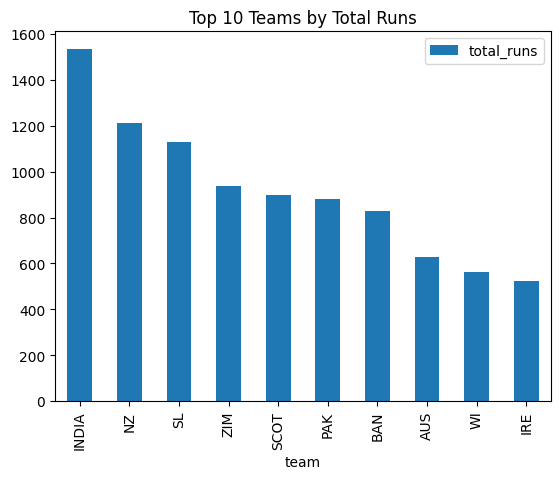

In [26]:
# 1. Team Performance Analysis
team_runs = df.groupby('home_team')['runs'].sum().reset_index()
team_runs.columns = ['team', 'total_runs']
team_runs.sort_values('total_runs', ascending=False).head(10).plot(kind='bar', x='team', y='total_runs', title='Top 10 Teams by Total Runs')

<Axes: title={'center': 'Top 10 Run Scorers'}, xlabel='player'>

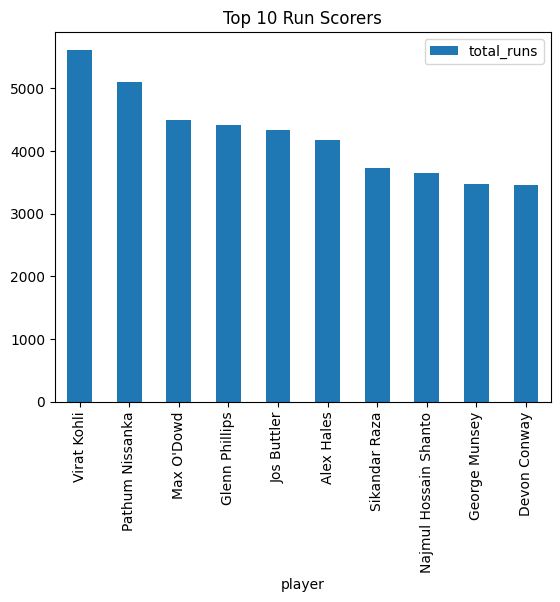

In [27]:
# 2. Player Performance Analysis
top_run_scorers = df.groupby('batsman1_name')['batsman1_runs'].sum().reset_index()
top_run_scorers.columns = ['player', 'total_runs']
top_run_scorers.sort_values('total_runs', ascending=False).head(10).plot(kind='bar', x='player', y='total_runs', title='Top 10 Run Scorers')

<Axes: title={'center': 'Top 10 Wicket Takers'}, xlabel='player'>

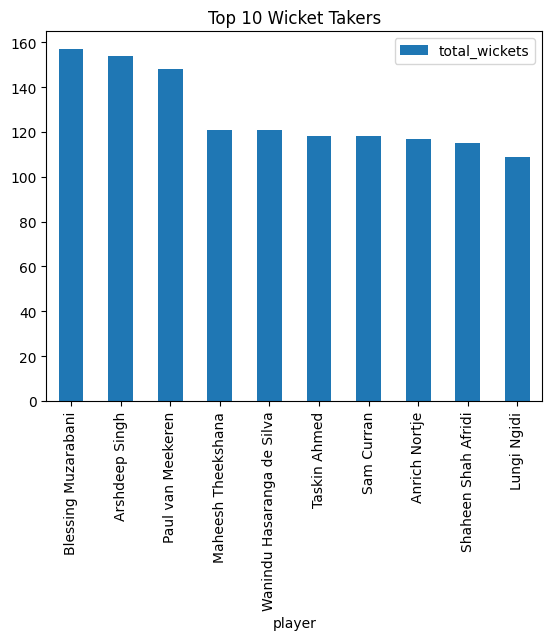

In [28]:
top_wicket_takers = df.groupby('bowler1_name')['bowler1_wkts'].sum().reset_index()
top_wicket_takers.columns = ['player', 'total_wickets']
top_wicket_takers.sort_values('total_wickets', ascending=False).head(10).plot(kind='bar', x='player', y='total_wickets', title='Top 10 Wicket Takers')

<Axes: title={'center': 'Distribution of Boundaries per Match'}, ylabel='Frequency'>

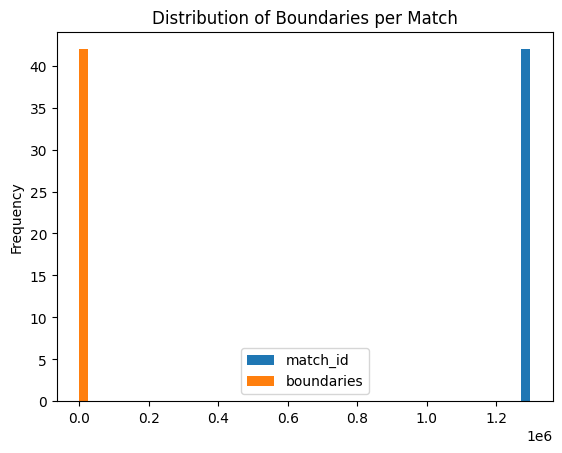

In [29]:
# 3. Event Inference
boundaries_per_match = df.groupby('match_id')['isBoundary'].sum().reset_index()
boundaries_per_match.columns = ['match_id', 'boundaries']
boundaries_per_match.plot(kind='hist', bins=50, title='Distribution of Boundaries per Match')

<Axes: title={'center': 'Distribution of Wickets per Match'}, ylabel='Frequency'>

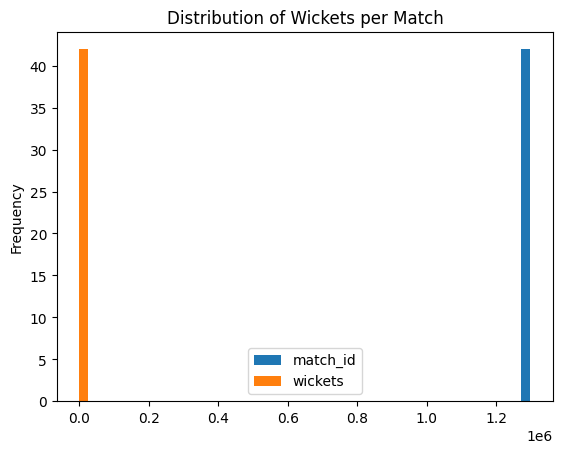

In [30]:
wickets_per_match = df.groupby('match_id')['bowler1_wkts'].sum().reset_index()
wickets_per_match.columns = ['match_id', 'wickets']
wickets_per_match.plot(kind='hist', bins=50, title='Distribution of Wickets per Match')

<Axes: title={'center': 'Top 10 Consistent Run Scorers'}, xlabel='player'>

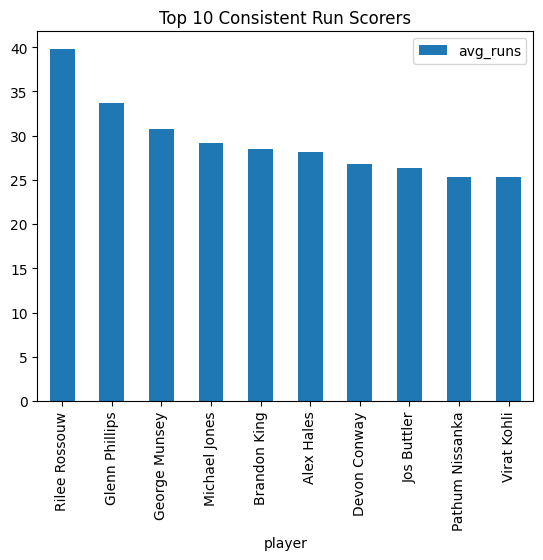

In [31]:
# 4. Performance Evaluation
consistent_run_scorers = df.groupby('batsman1_name')['batsman1_runs'].mean().reset_index()
consistent_run_scorers.columns = ['player', 'avg_runs']
consistent_run_scorers.sort_values('avg_runs', ascending=False).head(10).plot(kind='bar', x='player', y='avg_runs', title='Top 10 Consistent Run Scorers')

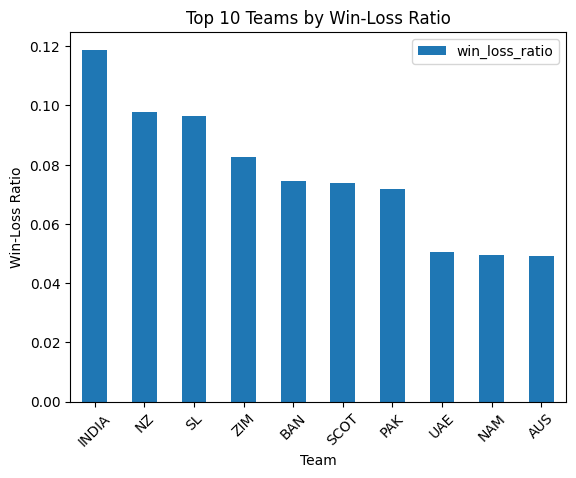

In [33]:
# Statistical Insights
team_win_loss_ratio = df.groupby('home_team')['match_id'].count().reset_index()
team_win_loss_ratio.columns = ['team', 'total_matches']
team_win_loss_ratio['win_loss_ratio'] = team_win_loss_ratio['total_matches'] / team_win_loss_ratio['total_matches'].sum()
team_win_loss_ratio.sort_values('win_loss_ratio', ascending=False).head(10).plot(kind='bar', x='team', y='win_loss_ratio', title='Top 10 Teams by Win-Loss Ratio')

plt.title('Top 10 Teams by Win-Loss Ratio')
plt.xlabel('Team')
plt.ylabel('Win-Loss Ratio')
plt.xticks(rotation=45)
plt.show()
